<a href="https://colab.research.google.com/github/brendaFlavia/DeepLearningAssignment/blob/main/Copy_of_Copy_of_LungOpacity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import glob
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

import pathlib
#train and Validation data directory 
#train_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/train_images') 

#test data directory
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_images') 

#train and Validation data directory 
train_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/train_images') 

#path to data set two
data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

#path to unknown images labels
test_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/test_images')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
img_width, img_height = 180,180
batch_size = 32

In [12]:
#unknown images
test_ds2 = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=50
  )

Found 50 files belonging to 1 classes.


In [13]:
#dataset 2
test_datas2 = tf.keras.utils.image_dataset_from_directory(
  data_set2,
  shuffle=False,
  image_size=(img_height, img_width),
  color_mode='rgb',
  batch_size=224
  )

Found 224 files belonging to 2 classes.


In [14]:
# Define image data generators
# Train data


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [15]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


In [17]:
#test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=50
  )


Found 50 files belonging to 1 classes.


In [19]:
# Load class names for the dataset
class_names = val_ds.class_names
print(class_names)

['normal', 'sick']


In [20]:
# Load class names for the dataset
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


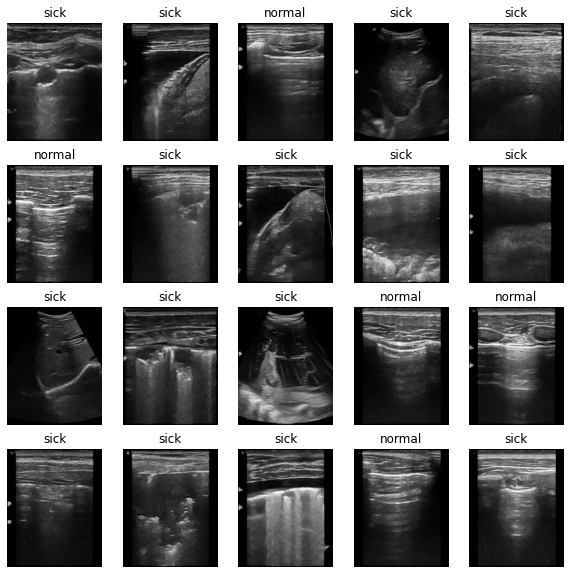

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [21]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [22]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset_2=test_datas2.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
#create a model
model = models.Sequential()

creat seguential model that uses rectified linear activation function. output the input directly if it is positive, otherwise, it will output zero 

In [25]:
#num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])

use loss function SparseCategoricalCrossentropy because it Computes the crossentropy loss between the labels and predictions

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
result=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
)

Epoch 1/5
18/18 [==============================] - 39s 2s/step - loss: 0.4664 - accuracy: 0.7517 - val_loss: 0.1914 - val_accuracy: 0.9301
Epoch 2/5
18/18 [==============================] - 0s 23ms/step - loss: 0.2384 - accuracy: 0.9108 - val_loss: 0.1508 - val_accuracy: 0.9580
Epoch 3/5
18/18 [==============================] - 0s 22ms/step - loss: 0.1197 - accuracy: 0.9598 - val_loss: 0.1019 - val_accuracy: 0.9580
Epoch 4/5
18/18 [==============================] - 0s 22ms/step - loss: 0.0600 - accuracy: 0.9790 - val_loss: 0.0806 - val_accuracy: 0.9580
Epoch 5/5
18/18 [==============================] - 0s 22ms/step - loss: 0.0308 - accuracy: 0.9930 - val_loss: 0.0674 - val_accuracy: 0.9720


Check Accuracy on different datasets

In [28]:
#test dataset
test_loss, test_acc = model.evaluate(test_data)

1/1 [==============================] - 7s 7s/step - loss: 3.5078 - accuracy: 0.5000


In [ ]:
print(test_acc)

1.0


In [29]:
#validation set
test_loss, test_acc = model.evaluate(val_ds)

5/5 [==============================] - 0s 10ms/step - loss: 0.0674 - accuracy: 0.9720


In [30]:
#train set
test_loss, test_acc = model.evaluate(train_ds)

18/18 [==============================] - 0s 10ms/step - loss: 0.0115 - accuracy: 1.0000


In [31]:
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 28s 28s/step - loss: 3.8264 - accuracy: 0.4464


Visualize Training and Validation Loss and Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

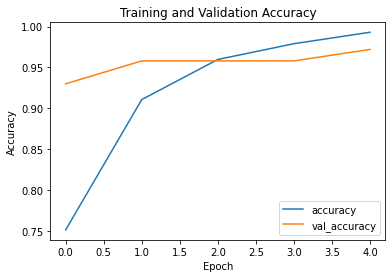

In [32]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

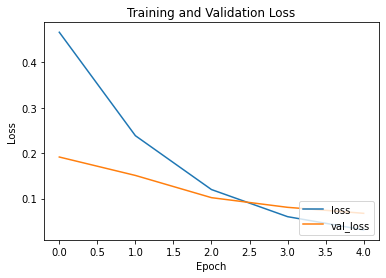

In [33]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Make Predictions on Known Images Lables

Predictions:
 [0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


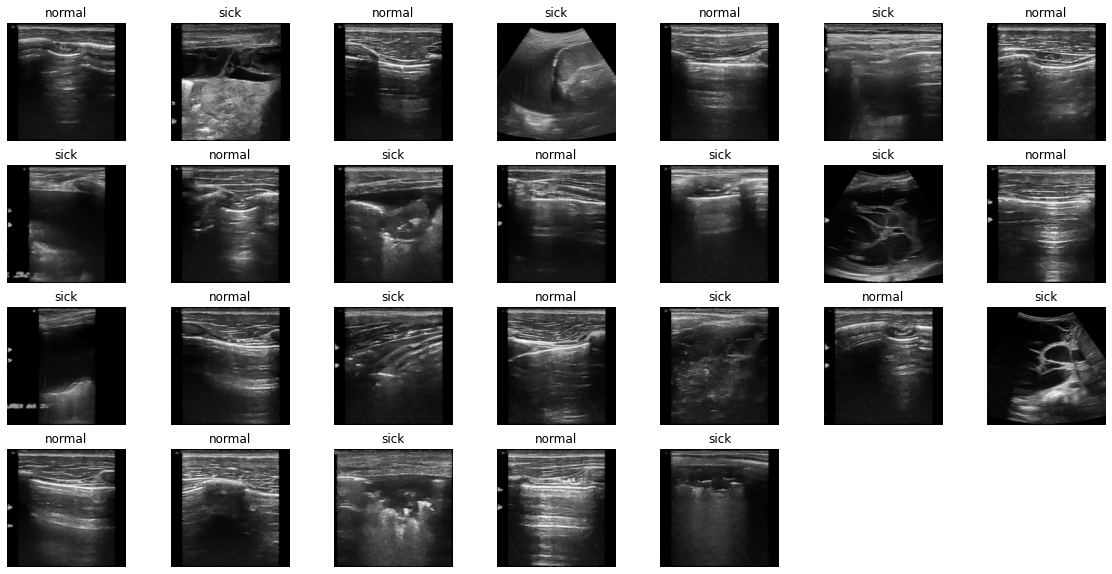

In [34]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(26):
  ax = plt.subplot(4, 7, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Confusion matrix on test data

In [38]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_dataset_2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
#print (cm)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.24      0.45      0.31       224
weighted avg       0.24      0.45      0.31       224



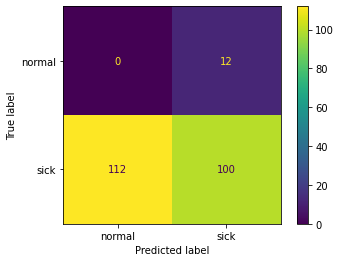

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

Apply Data Augumentation

In [41]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

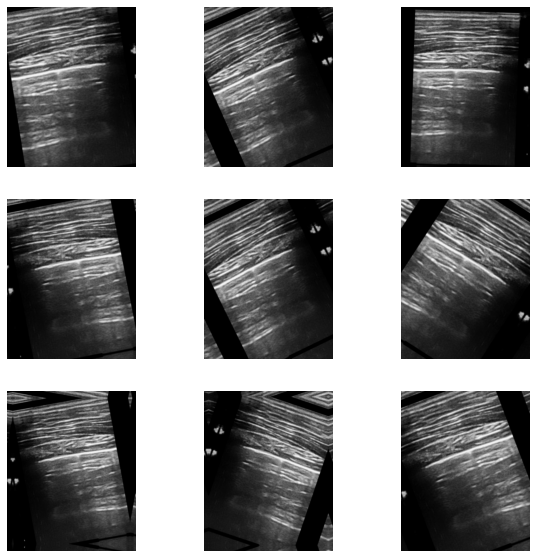

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [43]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [44]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#es=EarlyStopping(monitor='val_loss', mode='min',verbose=1)

In [45]:
#fit the model

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
18/18 [==============================] - 2s 39ms/step - loss: 0.6774 - accuracy: 0.6084 - val_loss: 0.3889 - val_accuracy: 0.8671
Epoch 2/15
18/18 [==============================] - 0s 28ms/step - loss: 0.4316 - accuracy: 0.8059 - val_loss: 0.2849 - val_accuracy: 0.8462
Epoch 3/15
18/18 [==============================] - 0s 27ms/step - loss: 0.3079 - accuracy: 0.8689 - val_loss: 0.6204 - val_accuracy: 0.7972
Epoch 4/15
18/18 [==============================] - 1s 28ms/step - loss: 0.2421 - accuracy: 0.8951 - val_loss: 0.4409 - val_accuracy: 0.8392
Epoch 5/15
18/18 [==============================] - 0s 28ms/step - loss: 0.1940 - accuracy: 0.9161 - val_loss: 0.3185 - val_accuracy: 0.8881
Epoch 6/15
18/18 [==============================] - 0s 28ms/step - loss: 0.1599 - accuracy: 0.9388 - val_loss: 0.3415 - val_accuracy: 0.8951
Epoch 7/15
18/18 [==============================] - 1s 28ms/step - loss: 0.2352 - accuracy: 0.8916 - val_loss: 0.7265 - val_accuracy: 0.7902
Epoch 8/15
18

Test **accuracy** Images

In [46]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 0s - loss: 2.5063 - accuracy: 0.5800 - 31ms/epoch - 31ms/step


In [47]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

18/18 - 0s - loss: 0.1561 - accuracy: 0.9266 - 203ms/epoch - 11ms/step


In [48]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

5/5 - 0s - loss: 0.1935 - accuracy: 0.9231 - 64ms/epoch - 13ms/step


In [49]:
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 0s 85ms/step - loss: 3.3403 - accuracy: 0.5223


Visualize Training an validation Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

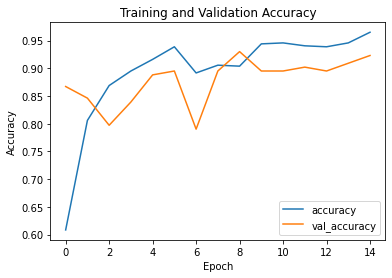

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

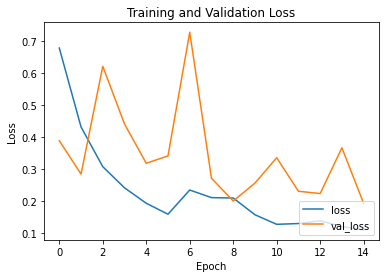

In [51]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

**Apply L2 Regulization to reduce overfitting and dropout layer and also increase the number of layers.
Also add add a penalty for weight size to the loss function.**

In [52]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same" ,kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(512, 5, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(4,4),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [53]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [54]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
18/18 [==============================] - 4s 117ms/step - loss: 1.0788 - accuracy: 0.5052 - val_loss: 0.8411 - val_accuracy: 0.7483
Epoch 2/15
18/18 [==============================] - 1s 66ms/step - loss: 0.7955 - accuracy: 0.6066 - val_loss: 0.8523 - val_accuracy: 0.4825
Epoch 3/15
18/18 [==============================] - 1s 61ms/step - loss: 0.7247 - accuracy: 0.6818 - val_loss: 0.7499 - val_accuracy: 0.5804
Epoch 4/15
18/18 [==============================] - 1s 61ms/step - loss: 0.6244 - accuracy: 0.7395 - val_loss: 0.5940 - val_accuracy: 0.8182
Epoch 5/15
18/18 [==============================] - 1s 61ms/step - loss: 0.5828 - accuracy: 0.7780 - val_loss: 0.5705 - val_accuracy: 0.8112
Epoch 6/15
18/18 [==============================] - 1s 64ms/step - loss: 0.5475 - accuracy: 0.7867 - val_loss: 0.4705 - val_accuracy: 0.8392
Epoch 7/15
18/18 [==============================] - 1s 61ms/step - loss: 0.4939 - accuracy: 0.8059 - val_loss: 0.4492 - val_accuracy: 0.8741
Epoch 8/15
1

Text(0.5, 1.0, 'Training and Validation Accuracy')

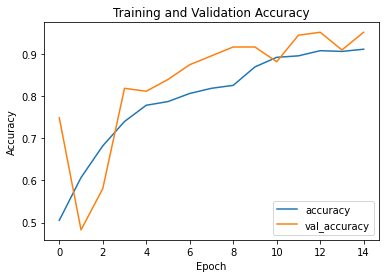

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

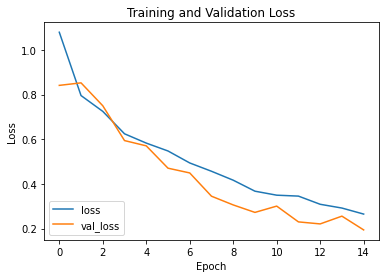

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

In [57]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

5/5 - 0s - loss: 0.1943 - accuracy: 0.9510 - 129ms/epoch - 26ms/step


In [58]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 1s - loss: 2.0045 - accuracy: 0.5000 - 633ms/epoch - 633ms/step


In [59]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

18/18 - 0s - loss: 0.2276 - accuracy: 0.9301 - 418ms/epoch - 23ms/step


In [60]:
test_loss, test_acc = model.evaluate(test_datas2, verbose=2)

1/1 - 3s - loss: 2.0636 - accuracy: 0.4911 - 3s/epoch - 3s/step


Classify the unknown images

In [ ]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results4.csv')
test_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/unknown_images')

Classification of unknown images

Predictions:
 [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


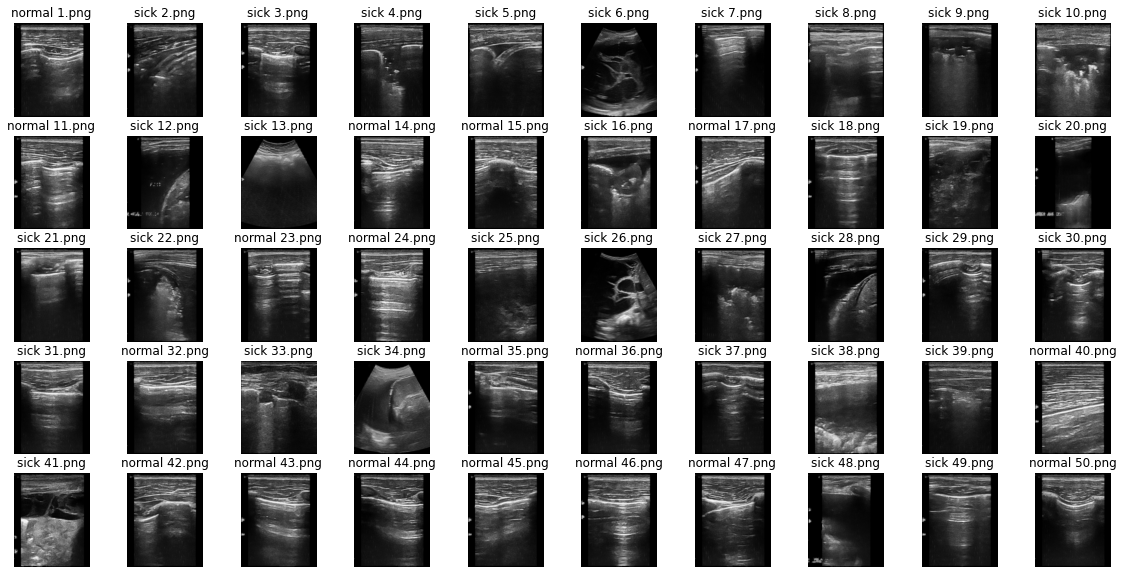

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

SAVE RESULTS IN CSV

In [ ]:
  
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0]


PREDICTIONS ON KNOWN DATASET 2

In [ ]:
dataset2 = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset2/normal/sick_eff100.png') 


#image_path = tf.keras.utils.get_file('Known_image', origin=dataset2)

img = tf.keras.utils.load_img(
    dataset2, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sick with a 99.98 percent confidence.


In [ ]:
test_data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

In [ ]:
image_batch, label_batch = test_datas2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#plt.figure(figsize=(20, 10))
#for i in range(10):
  #ax = plt.subplot(10, 10, i + 1)
  #plt.imshow(image_batch[i].astype("uint8"))
  #plt.title(class_names[predictions[i]])
  #plt.axis("off")

Predictions:
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Labels:
 [0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 0 1]


Evalute model on Dataset 2

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 2.6689 - accuracy: 0.4509 - 2s/epoch - 2s/step


In [ ]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_datas2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
print (cm)

[[  1  12]
 [111 100]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.08      0.01      0.02       112
           1       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.28      0.45      0.32       224
weighted avg       0.28      0.45      0.32       224



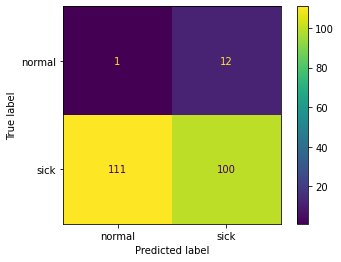

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1908 - accuracy: 0.9457 - val_loss: 0.5418 - val_accuracy: 0.7299
Epoch 2/100
28/28 [==============================] - 6s 213ms/step - loss: 0.1735 - accuracy: 0.9511 - val_loss: 0.8707 - val_accuracy: 0.6058
Epoch 3/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1632 - accuracy: 0.9583 - val_loss: 0.2497 - val_accuracy: 0.9270
Epoch 4/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1733 - accuracy: 0.9529 - val_loss: 0.9291 - val_accuracy: 0.5985
Epoch 5/100
28/28 [==============================] - 6s 215ms/step - loss: 0.1648 - accuracy: 0.9511 - val_loss: 0.7849 - val_accuracy: 0.6423
Epoch 6/100
28/28 [==============================] - 6s 215ms/step - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.2835 - val_accuracy: 0.9197
Epoch 7/100
28/28 [==============================] - 6s 216ms/step - loss: 0.1582 - accuracy: 0.9529 - val_loss: 0.2719 - val_accuracy: 0.9416

Text(0.5, 1.0, 'Training and Validation Accuracy')

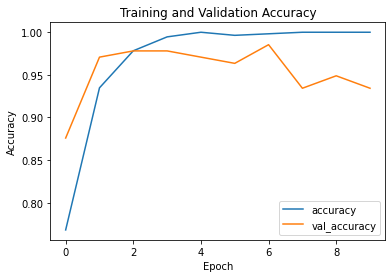

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

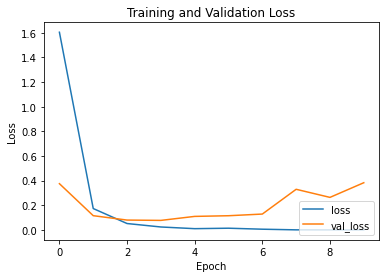

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_ds2, verbose=2)

1/1 - 0s - loss: 6.6646 - accuracy: 0.4000 - 436ms/epoch - 436ms/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 7.1777 - accuracy: 0.4509 - 2s/epoch - 2s/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(val_ds, verbose=2)

7/7 - 1s - loss: 0.2209 - accuracy: 0.9197 - 552ms/epoch - 79ms/step


Predictions:
 [0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


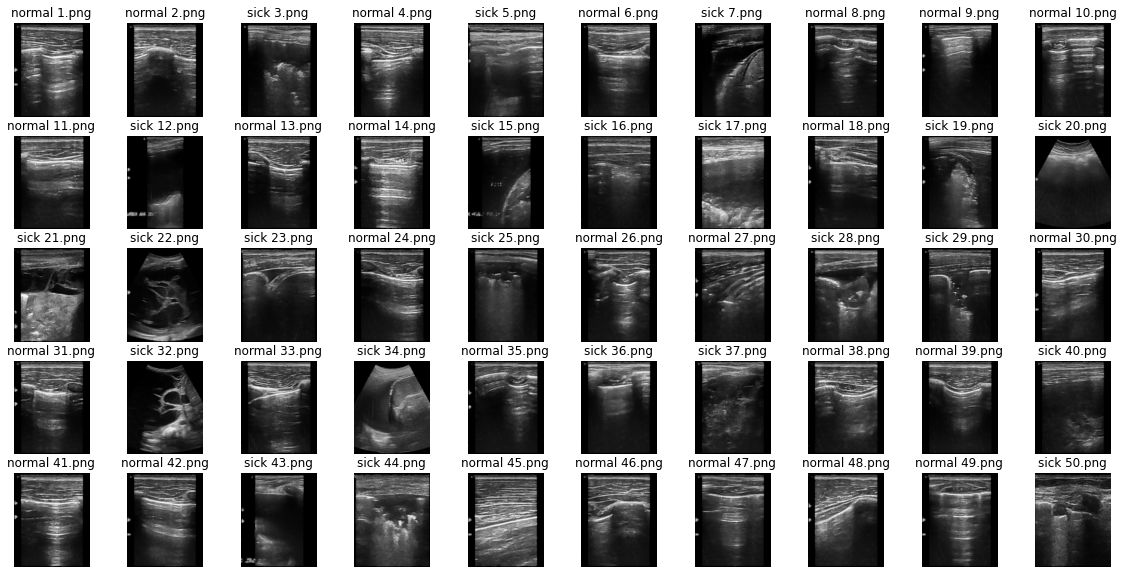

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

In [ ]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results3.csv')

In [ ]:
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
